### Implementing Ml algorithm on Picture data


## Mnist Dataset
The dataset contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print("Train features:",x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",x_test.shape)
print("Test Labels:   ",y_test.shape)

Train features: (60000, 28, 28)
Train Labels:   (60000,)
Test Features:  (10000, 28, 28)
Test Labels:    (10000,)


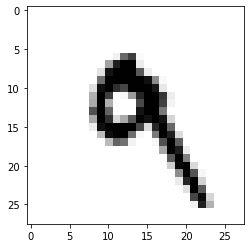

In [ ]:
# Visualizing data
import matplotlib.pyplot as plt
digit  = x_test[7]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()

In [ ]:
# Its label
y_test[7]

9

### Normalizing Data
Changing Dimension from 3 into 2
As you can see above there are multiple values between 0 to 255 and 255 is Max value so what we're doing is managing the values between 0 and 1 by dividing the train sets by 255.


In [ ]:
new_x_train = x_train.reshape(60000, 28 * 28)
new_x_test = x_test.reshape(10000, 28 * 28)
new_x_train, new_x_test = new_x_train/255.0, new_x_test/255.0

print("Train features:",new_x_train.shape)
print("Test Features: ",new_x_test.shape)

Train features: (60000, 784)
Test Features:  (10000, 784)


### One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical
new_y_train = to_categorical(y_train) 
new_y_test = to_categorical(y_test)

In [ ]:
##################

In [ ]:
X_trainL = new_x_train
y_trainL = new_y_train
X_testL = new_x_test
y_testL = new_y_test

### Algorithm 1 – Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_trainL, y_trainL)
Y_pred = modelLR.predict(X_testL)
#print(Y_pred)

In [ ]:
from sklearn import metrics
#calculating the residuals

print('y-intercept             :' , modelLR.intercept_,"\n")
print('beta coefficients       :' , modelLR.coef_,"\n")
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred),"\n")
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred),"\n")
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)),"\n")
print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

y-intercept             : [ 0.15837643  0.23967123  0.04920914  0.0198412   0.21118171  0.18862364
  0.06904376  0.14137067 -0.12167555  0.04570506] 

beta coefficients       : [[-6.05766130e+06  3.05582363e+11 -1.37397369e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.95956071e+06 -7.71946196e+10  7.14628261e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.62094027e+06  7.28664146e+11  1.31217323e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.53359013e+06 -3.23121335e+11  1.74891077e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.08283705e+06  3.54699392e+10 -4.93112550e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.57310545e+05 -2.15752423e+11  1.11734398e+11 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]] 

Mean Abs Error MAE      : 131838.9497499636 

Mean Sqrt Error MSE     : 270189305173933.2 

Root Mean Sqrt Error RMSE: 16437436.088816686 

r2 value                : -2889042401407613.5

In [ ]:
#####################

In [ ]:
X_train = new_x_train
y_train = y_train
X_test = new_x_test
y_test = y_test

## 2. Decision Tree's

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()
Model.fit(X_train, y_train) # labels here are in string form
y_pred = Model.predict(X_test)
#print(y_pred)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       980
           1       0.96      0.97      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.84      0.86      0.85      1010
           4       0.87      0.87      0.87       982
           5       0.83      0.84      0.83       892
           6       0.91      0.89      0.90       958
           7       0.92      0.90      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[ 926    0    5    6    5   11    8    2    8    9]
 [   2 1096    9    2    2    5    5    5    8    1]
 [  11    7  884   28   16   11   13   27   24   11]
 [  10    6   33  866    7   42    4    8   19   15]
 [   9    4   11    8  858   

In [ ]:
# This code will work with almost all the models below
import numpy as np
predict = 41
print("Predicted Label :",y_pred[predict])   # predictd
print("Actual Label :",y_test[predict])   # Actual

Predicted Label : 7
Actual Label : 7


## Algorithm 3- RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.99      0.77       980
           1       0.52      0.99      0.68      1135
           2       0.79      0.54      0.64      1032
           3       0.60      0.69      0.64      1010
           4       0.56      0.67      0.61       982
           5       0.95      0.06      0.11       892
           6       0.82      0.55      0.66       958
           7       0.71      0.81      0.76      1028
           8       0.80      0.47      0.59       974
           9       0.57      0.44      0.50      1009

    accuracy                           0.63     10000
   macro avg       0.69      0.62      0.60     10000
weighted avg       0.69      0.63      0.60     10000

[[ 967    0   74   65   20  153  162   31   25   24]
 [   4 1128  295  153   31  131   81   77  257   32]
 [   1    0  561   18   17    5   40   38   30    3]
 [   1    2   23  701   12  317   28    0   64   29]
 [   0    0    9    6  660   

### Algorithm 4- Logistic Regression

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

[[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Algorithm 5- K Nearest Neighbors

In [ ]:
# its taking alot of time
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

### Algorithm 6- Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168   

### Algorithm 7- Support Vector Machines

In [ ]:
# taking a lot of time
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

### Algorithm 8- Radius Neighbors Classifier

In [ ]:
# taking a lot of time
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=8.0)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()
#Accouracy score
print('accuracy is ', accuracy_score(y_test,y_pred))

#Algorithm 9- Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.95      0.98      0.97      1135
           2       0.86      0.89      0.88      1032
           3       0.84      0.90      0.87      1010
           4       0.83      0.94      0.88       982
           5       0.93      0.76      0.84       892
           6       0.97      0.93      0.95       958
           7       0.95      0.84      0.89      1028
           8       0.81      0.84      0.82       974
           9       0.85      0.82      0.84      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[ 956    0    3    3    2    4    2    1    7    2]
 [   0 1113    5    6    1    2    3    0    5    0]
 [   8    7  920   34   19    2    5    5   30    2]
 [   7    0   29  911    4   11    2    7   31    8]
 [   1    2    6    3  922   

### Algorithm 10- BernoulliNB

In [ ]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       980
           1       0.90      0.96      0.93      1135
           2       0.89      0.83      0.86      1032
           3       0.76      0.84      0.80      1010
           4       0.83      0.81      0.82       982
           5       0.82      0.70      0.76       892
           6       0.89      0.89      0.89       958
           7       0.93      0.85      0.89      1028
           8       0.75      0.78      0.77       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795   

### Algorithm 11- ExtraTreeClassifier

In [ ]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       980
           1       0.95      0.96      0.96      1135
           2       0.83      0.80      0.82      1032
           3       0.78      0.80      0.79      1010
           4       0.79      0.81      0.80       982
           5       0.75      0.75      0.75       892
           6       0.83      0.85      0.84       958
           7       0.86      0.85      0.86      1028
           8       0.76      0.74      0.75       974
           9       0.78      0.79      0.79      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

[[ 882    0   17   11    4   16   23    4    8   15]
 [   0 1093    8    9    2    4   11    1    5    2]
 [  17    7  826   41   21   14   31   25   35   15]
 [   6   10   21  806    5   67    7   16   45   27]
 [   3    4   14   10  799   

### Algorithm 12- Bagging classifier

In [ ]:
# taking a lot of time
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

### Algorithm 13-AdaBoost classifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

[[ 883    0   30   28    4   29   20    7   40    9]
 [   0 1070   35   32    2   32   10   16   48   11]
 [  25    3  596   19   17    6   35   23   11   23]
 [   3    8   32  678   14  122    6    8   91   32]
 [   4    3   18    2  708   

### Algorithm 14- Gradient Boosting Classifier

In [ ]:
# taking a lot of time
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

### Algorithm 15- Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.89      0.97      0.93      1135
           2       0.92      0.79      0.85      1032
           3       0.87      0.87      0.87      1010
           4       0.84      0.90      0.87       982
           5       0.84      0.82      0.83       892
           6       0.91      0.89      0.90       958
           7       0.91      0.84      0.88      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.85      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

[[ 940    0   15    5    0    8   12    2    7    9]
 [   0 1096   32    5   12    8    8   30   27    7]
 [   1    4  816   25    6    4   11   15    8    1]
 [   4    3   34  883    0   44    0    9   27   13]
 [   2    2   21    4  888   

## Algorithm 16- Quadratic Discriminant Analysis


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print()
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.36      0.96      0.52       980
           1       0.90      0.95      0.92      1135
           2       0.92      0.17      0.29      1032
           3       0.62      0.28      0.38      1010
           4       0.89      0.10      0.19       982
           5       0.77      0.04      0.07       892
           6       0.73      0.94      0.82       958
           7       0.90      0.29      0.44      1028
           8       0.42      0.68      0.52       974
           9       0.43      0.95      0.59      1009

    accuracy                           0.54     10000
   macro avg       0.69      0.54      0.48     10000
weighted avg       0.70      0.54      0.48     10000

[[ 944   16  480  441  241  319   39   21  116   16]
 [   1 1075    9   13    6    6    6    8   58    9]
 [   1    1  177    1    5    1    1    2    2    2]
 [   7    1  106  281    7   18    1   14   13    4]
 [   0    1    5    0  103   